<a href="https://colab.research.google.com/github/khaulaejaz/Bike-Share-Analysis/blob/main/bike_share_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚴 Trip Data Analysis. Exploratory Data Analysis (EDA)

This notebook explores trip data to uncover trends, patterns, and insights.  
We’ll clean, transform, and visualize the data to understand user behavior and usage trends.

---

##   Steps Covered
1. Data Loading & Inspection  
2. Data Cleaning & Preprocessing  
3. Exploratory Data Analysis (EDA)  
   - Univariate Analysis  
   - Bivariate Analysis  
   - Correlation Analysis  
4. Visualization of Patterns & Trends  
5. Key Insights & Conclusion



In [2]:
# -------------------------------
# 1. Importing Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Setting visualization style
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")


In [3]:
# -------------------------------
# 2. Loading Dataset
# -------------------------------
#df = pd.read_csv('tripdata.csv')
#df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
#df = df[~df['ride_id'].str.contains('COUNT', na=False)]

from google.colab import drive
drive.mount('/content/drive')

csv_files = glob.glob('/content/drive/MyDrive/2022/*.csv')

df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

print(f"Merged dataframe shape: {df.shape}")


Mounted at /content/drive
Merged dataframe shape: (5667717, 13)


In [ ]:
# -------------------------------
# 3. Previewing the dataset
# -------------------------------

print(df.head())
print(df.shape)
df.describe(include='all')
print(df.info)
df.isnull().sum()
df.duplicated().sum()
df.dtypes
df['rideable_type'].unique()
df['member_casual'].unique()

,0
ride_id,object
rideable_type,object
started_at,object
ended_at,object
start_station_name,object
start_station_id,object
end_station_name,object
end_station_id,object
start_lat,float64
start_lng,float64


In [4]:
# -----------------------------------
# 4. Cleaning & Preprocessing Data
# -----------------------------------

#Conversions for datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

#Conversions for Strings
df['ride_id'] = df['ride_id'].astype(str)
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['start_station_name'] = df['start_station_name'].astype(str)
df['end_station_name'] = df['end_station_name'].astype(str)

#Conversions for Categories
df['rideable_type'] = pd.Categorical(df['rideable_type'])
df['member_casual'] = pd.Categorical(df['member_casual'])


In [5]:
# Cleaning & Preprocessing Data continued
# ----------------------------------------

# After converting Ids and station names to string, nulls are alsio in string as "nan" now, so we need to convert them as nulls again
df['start_station_id'] = df['start_station_id'].replace("nan", np.nan)
df['end_station_id']   = df['end_station_id'].replace("nan", np.nan)
df['end_station_name'] = df['end_station_name'].replace("nan", np.nan)
df['start_station_name'] = df['start_station_name'].replace("nan", np.nan)

In [6]:
#  Replacing NaN with "Unknown" now
df[["start_station_name", "start_station_id", "end_station_name", "end_station_id"]] = (
    df[["start_station_name", "start_station_id", "end_station_name", "end_station_id"]]
    .fillna("Unknown")
)



In [7]:
# Dropping some nulls
df.dropna(subset = ['end_lat', 'end_lng'], inplace= True)

In [ ]:
# Checking Duplicates for ride Ids

df['ride_id'].duplicated().sum()

np.int64(0)

In [8]:
# Dropping Duplicate ride ids just keeping the first

df = df.drop_duplicates(subset='ride_id', keep = 'first')

In [ ]:
df['end_station_name'].unique()[:20]  # check first 20 unique values


array(['Clark St & Touhy Ave', 'Greenview Ave & Fullerton Ave',
       'Paulina St & Montrose Ave', 'State St & Randolph St',
       'Honore St & Division St', 'Broadway & Sheridan Rd',
       'Damen Ave & Clybourn Ave', 'Clinton St & Washington Blvd',
       'Broadway & Granville Ave', 'Stockton Dr & Wrightwood Ave',
       'Larrabee St & Kingsbury St', 'St. Clair St & Erie St',
       'Lincoln Park Conservatory', 'Clark St & Ida B Wells Dr',
       'Indiana Ave & Roosevelt Rd', 'Clark St & Schreiber Ave',
       'Michigan Ave & Washington St', 'Sedgwick St & North Ave',
       'Milwaukee Ave & Rockwell St', 'Halsted St & Roscoe St'],
      dtype=object)

In [9]:
# Data Cleaning/Standardization
# Remove leading/trailing spaces from text fields for consistent formatting
df['start_station_name'] = df['start_station_name'].str.strip()
df['end_station_name'] = df['end_station_name'].str.strip()

df['start_station_name'] = df['start_station_name'].str.title()
df['end_station_name'] = df['end_station_name'].str.title()

df['member_casual']= df['member_casual'].str.strip().str.lower()
df['rideable_type']= df['rideable_type'].str.strip().str.lower()

In [10]:
# Getting rid of any invalid rows where ride time length is in negative
df = df[df["ended_at"] > df["started_at"]]


In [ ]:
# Checking if we still have any invalid rows left
invalid_rows = df[df["ended_at"] < df["started_at"]]
print(len(invalid_rows))


0


In [11]:
# -------------------------------
# 5. Feature Engineering
# We create new columns from existing data to support deeper analysis and uncover patterns.
# -------------------------------
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
df['day_name'] = df['started_at'].dt.day_name()
df['month_name'] = df['started_at'].dt.month_name()
df['hour'] = df['started_at'].dt.hour
df['is_weekend'] = df['day_name'].isin(['Saturday', 'Sunday'])


In [ ]:
# Checking if we have ride lengths greater than 24 hours which is also invalid
invalid_ride_lengths = df[df['ride_length'] > 24*60]
print(len(invalid_ride_lengths))

206


In [12]:
# Getting rid of invalid rides greater than 24hrs
df = df[df['ride_length'] <= 24*60]

# 5. Exploratory Data Analysis (EDA)

In this section, we explore the dataset to uncover **patterns, trends, and relationships**.  

---

## Analysis Types
- **Univariate:** Distribution of single variables (such as: ride length, ride type, start time)  
- **Bivariate:** Relationship between two variables (e.g., ride type vs. day of week)  
- **Time Trends:** Seasonal, monthly, weekly, and hourly ride usage  
- **User Groups:** Compare behaviors of members vs. casual riders  
- **Station Patterns:** Top start/end stations
- **Correlation:** Associations between numeric features (ride length, distance)  


---

## Key Questions
- When are rides most common?  
- How do members differ from casual users?  
- What days/times are most popular?  
- Are there anomalies or unusual rides?  


---
##**Univariate Analysis With Visuals**
---

Univariate analysis focuses on understanding each variable independently to establish baseline patterns in the data. This step helps in identifying overall distributions and ensures that derived time-based features correctly reflect ride behavior.

####**This section includes:**
*   Distribution of user types (member_casual)
*   Time based distributions such as month, day of week, and weekend vs weekday
*   Validation of derived features for consistency and balance
####**Purpose:**
*   Build foundational understanding of the dataset
*   Identify dominant categories and overall usage trends
*   Prepare variables for relationship-based analysis








**Ride length summary statistics**






In [ ]:
#Basic statistics for ride length

min_ride_length = df['ride_length'].min()
max_ride_length = df['ride_length'].max()
mean_ride_length = df['ride_length'].mean()

print("min ride length: ",min_ride_length)
print("max ride length: ",max_ride_length)
print("avg ride length: ",round(mean_ride_length,3))

#Full Summary distribution
print("\nRide length statistical summary\n",df['ride_length'].describe())


min ride length:  0.016666666666666666
max ride length:  1439.3666666666666
avg ride length:  16.225

Ride length statistical summary
 count    5.661122e+06
mean     1.622453e+01
std      2.869098e+01
min      1.666667e-02
25%      5.816667e+00
50%      1.026667e+01
75%      1.841667e+01
max      1.439367e+03
Name: ride_length, dtype: float64


**Distribution of ride lengths**

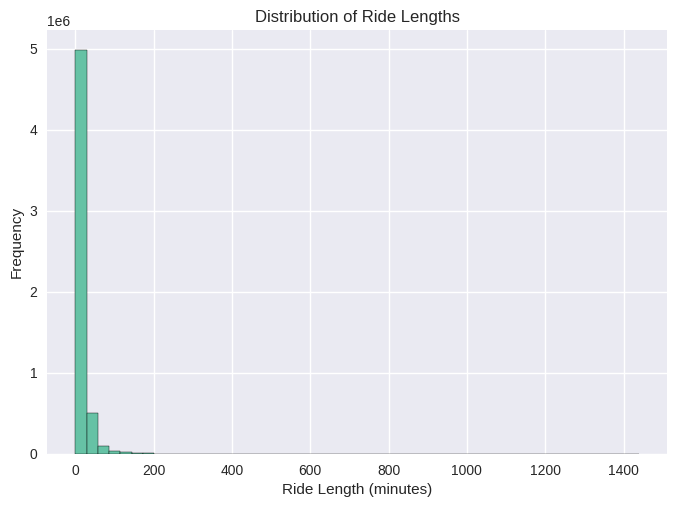

In [ ]:
# HISTOGRAM FOR OVERALL RIDE LENGTH
import matplotlib.pyplot as plt
plt.hist(df['ride_length'], bins = 50, edgecolor = 'black')
plt.xlabel('Ride Length (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Ride Lengths')
plt.show()

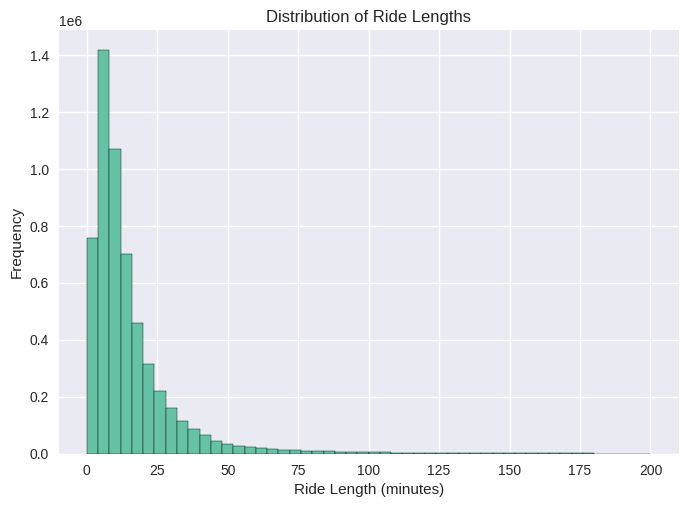

In [ ]:
# HISTOGRAM FOR RIDE LENGTH ( MORE FOCUSED ON THE CLUSTER UNDER 200 MINS)
import matplotlib.pyplot as plt
plt.hist(df[df['ride_length'] <= 200]['ride_length'], bins = 50, edgecolor = 'black')
plt.xlabel('Ride Length (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Ride Lengths')
plt.show()

**Rideable Type Usage Overview**

Rideable types in Percentage: 
 electric_bike    51.0
classic_bike     45.9
docked_bike       3.1
dtype: float64


Text(0, 0.5, 'Percentage of rides')

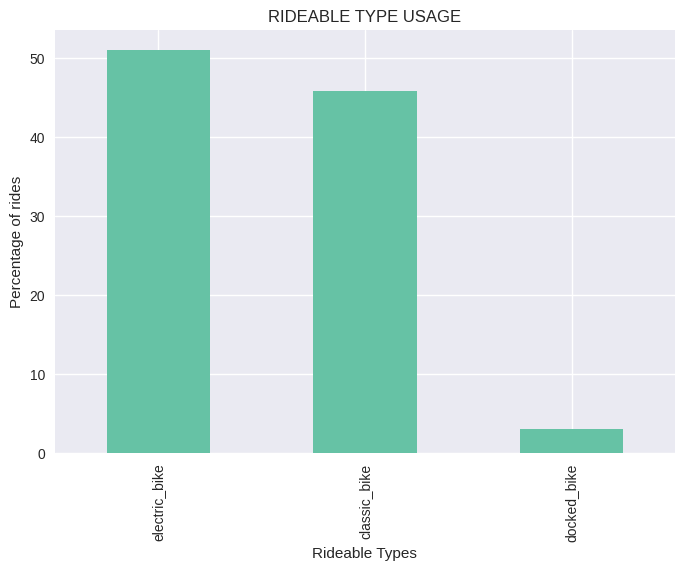

In [ ]:
ridetype_pct= df['rideable_type'].value_counts(normalize=True) * 100
ridetype_pct.name = None          # remove Series name
ridetype_pct.index.name = None    # remove index name
print("Rideable types in Percentage: \n",ridetype_pct.round(1))
ridetype_pct.plot(kind = 'bar', title = "RIDEABLE TYPE USAGE")
plt.xlabel("Rideable Types")
plt.ylabel("Percentage of rides")

**Member vs Casual:  No of Rides**

Text(0, 0.5, 'Percentage of rides')

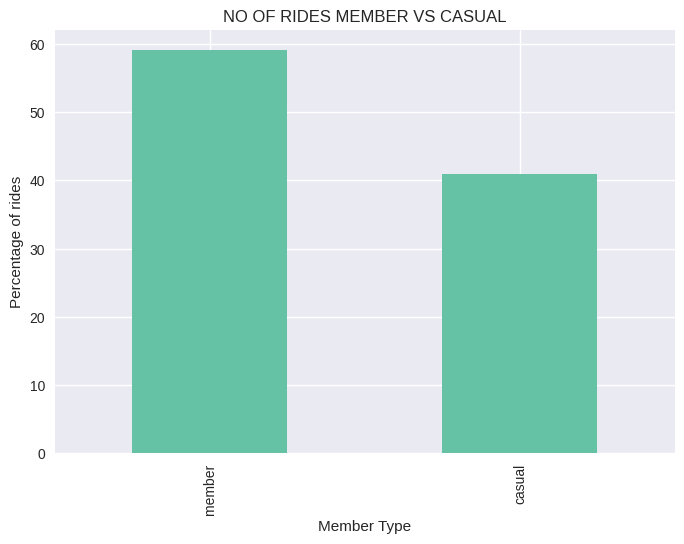

In [ ]:
#RIDES BY USER TYPE
rider_type = df['member_casual'].value_counts(normalize = True)*100


#PLOT

rider_type.plot(kind = 'bar', title = "NO OF RIDES MEMBER VS CASUAL")
plt.xlabel('Member Type')
plt.ylabel('Percentage of rides')

**Ride patterns by day of week**

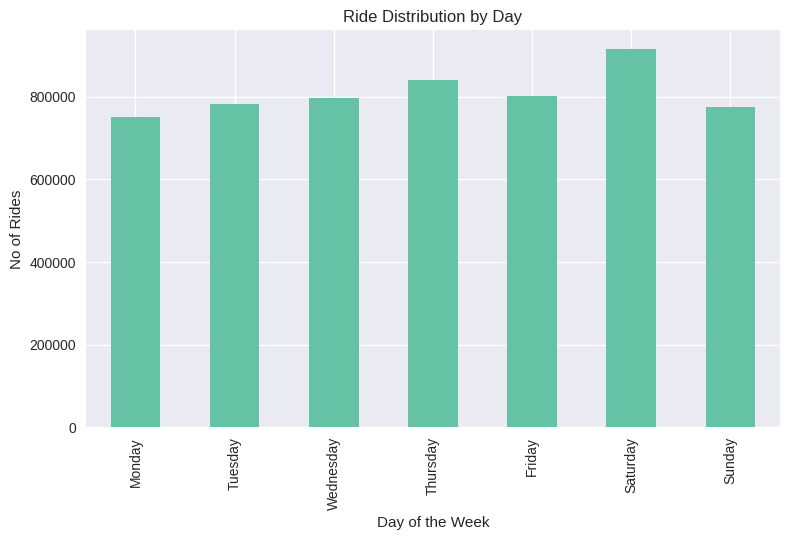

In [ ]:
# RIDE COUNT PER DAY (percentage)
day_count = (df['day_name']
           .value_counts()
           .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']))

day_count.plot(kind='bar', title="Ride Distribution by Day")
plt.xlabel('Day of the Week')
plt.ylabel('No of Rides')
plt.tight_layout()
plt.show()

**Ride Distribution by hour**

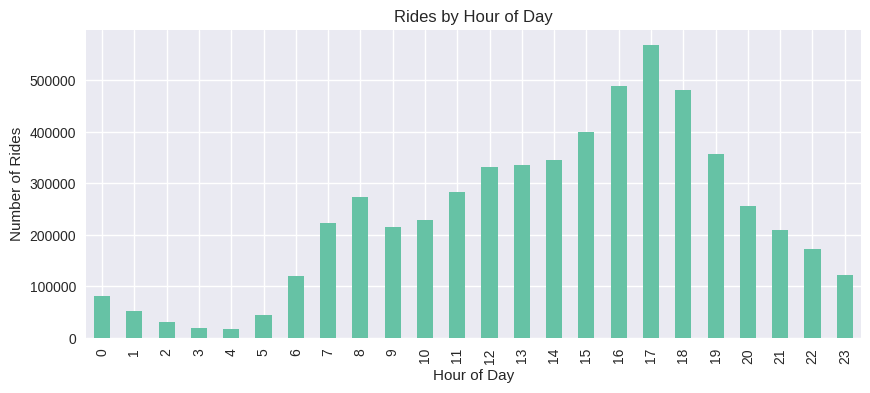

In [ ]:

df.groupby('hour')['ride_id'].count().plot(kind='bar', figsize=(10,4), title="Rides by Hour of Day")
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()


**TOP 10 STATIONS**

=== Top 10 Start Stations ===
start_station_name
Streeter Dr & Grand Ave               71255
Dusable Lake Shore Dr & Monroe St     39245
Dusable Lake Shore Dr & North Blvd    37696
Michigan Ave & Oak St                 37203
Wells St & Concord Ln                 34507
Millennium Park                       32843
Clark St & Elm St                     32553
Kingsbury St & Kinzie St              31613
Theater On The Lake                   31281
Wells St & Elm St                     28977
Name: count, dtype: int64 

=== Top 10 End Stations ===
end_station_name
Streeter Dr & Grand Ave               72528
Dusable Lake Shore Dr & North Blvd    40560
Dusable Lake Shore Dr & Monroe St     38499
Michigan Ave & Oak St                 38274
Wells St & Concord Ln                 34687
Millennium Park                       33701
Clark St & Elm St                     32221
Theater On The Lake                   31670
Kingsbury St & Kinzie St              30450
Wells St & Elm St                     2834

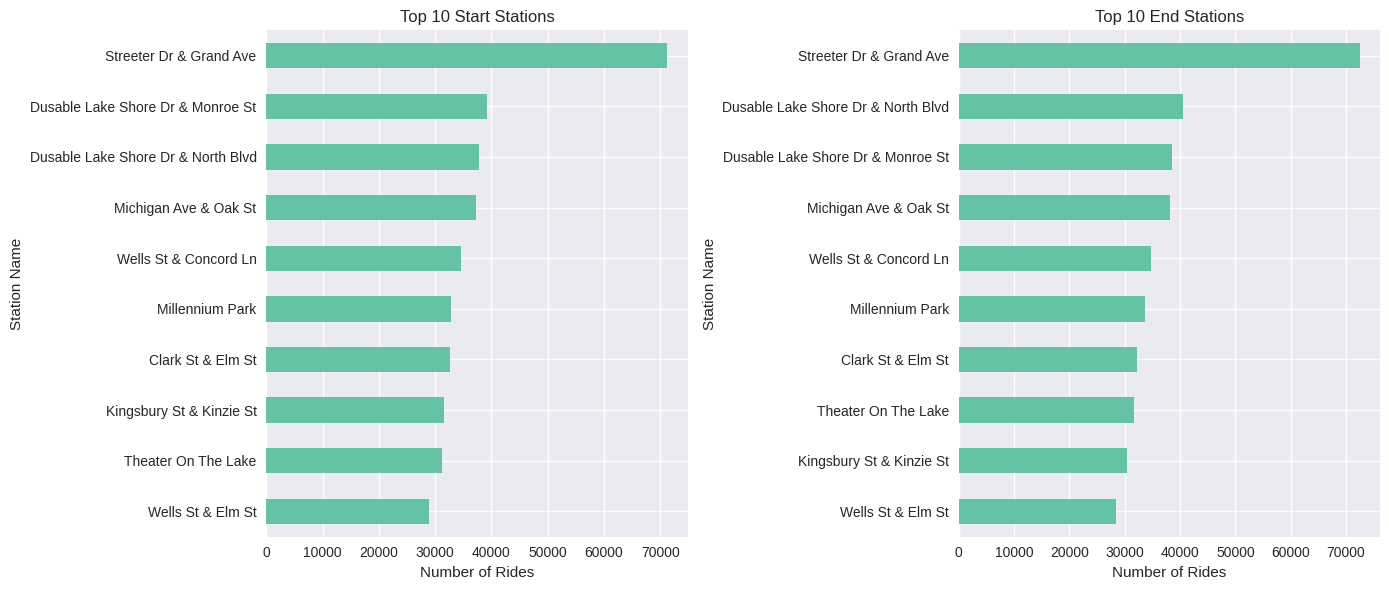

In [13]:
### Cleaning Unknown Stations
# Remove 'Unknown' since it skews the analysis
df_clean = df[df['start_station_name'] != 'Unknown']
df_clean = df_clean[df_clean['end_station_name'] != 'Unknown']


# Get the top 10 most common starting stations
top_start = df_clean['start_station_name'].value_counts().head(10)
print("=== Top 10 Start Stations ===")
print(top_start, "\n")

# Get the top 10 most common ending stations
top_end = df_clean['end_station_name'].value_counts().head(10)
print("=== Top 10 End Stations ===")
print(top_end, "\n")

# Subplots for better comparision
plt.figure(figsize=(14,6))

# --- Subplot 1: Top 10 Start Stations ---
plt.subplot(1,2,1)
top_start.sort_values().plot(kind = 'barh')
plt.xlabel('Number of Rides')
plt.ylabel('Station Name')
plt.title('Top 10 Start Stations')

# --- Subplot 2: Top 10 End Stations ---
plt.subplot(1,2,2)
top_end.sort_values().plot(kind='barh')
plt.title("Top 10 End Stations")
plt.xlabel("Number of Rides")
plt.ylabel("Station Name")

plt.tight_layout()
plt.show()

### **Why We Removed the Unknown Stations**

---

During the initial exploration of station usage, a very large proportion of rides were associated with the station name "Unknown". Specifically, **69.26% of the top start station** records and **70.54% of the top end station** records were labeled as unknown.

Because this extremely high amount of missing station information disproportionately dominates the distribution, it skews the analysis and hides the actual patterns of how riders are using real stations.

To ensure that the station-level insights (such as popularity, usage patterns, and demand hotspots) are meaningful and not distorted, these “Unknown” entries were removed before further analysis. This allows the analysis to focus on real, physical stations and leads to cleaner, more reliable insights.

**ROUND TRIP STATIONS**

In [ ]:
round_trip = df_clean[df_clean['start_station_name'] == df_clean['end_station_name']]
round_trip_count = round_trip.value_counts()
round_trip_count.plot(kind = 'bar', title = "ROUND TRIP STATIONS")
plt.xlabel('Station Name')
plt.ylabel('Number of Round Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**WEEKEND vs WEEKDAY USAGE**

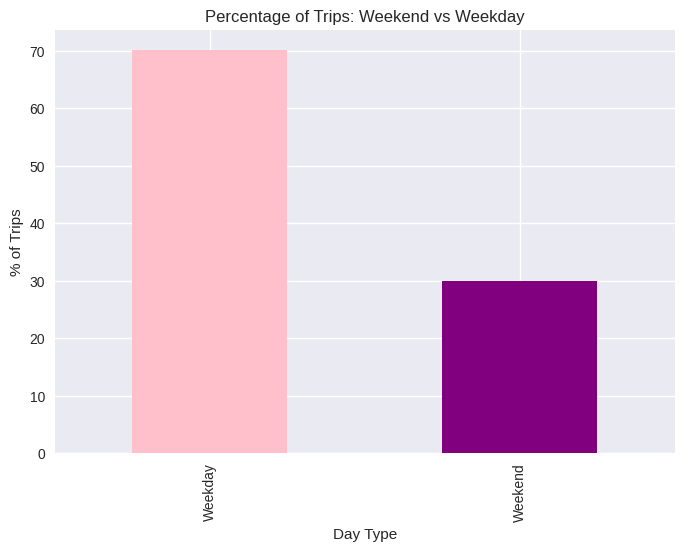

In [ ]:

weekend_count = df['is_weekend'].value_counts(normalize = True).sort_index() * 100



weekend_count.plot(kind = 'bar', color = ['pink', 'purple'], title = "WEEKEND VS WEEKDAY")
plt.xticks(ticks=[0,1], labels=['Weekday', 'Weekend'])
plt.xlabel('Day Type')
plt.ylabel('% of Trips')
plt.title('Percentage of Trips: Weekend vs Weekday')
plt.show()

**MONTHY RIDE TRENDS (data is only of one year)**

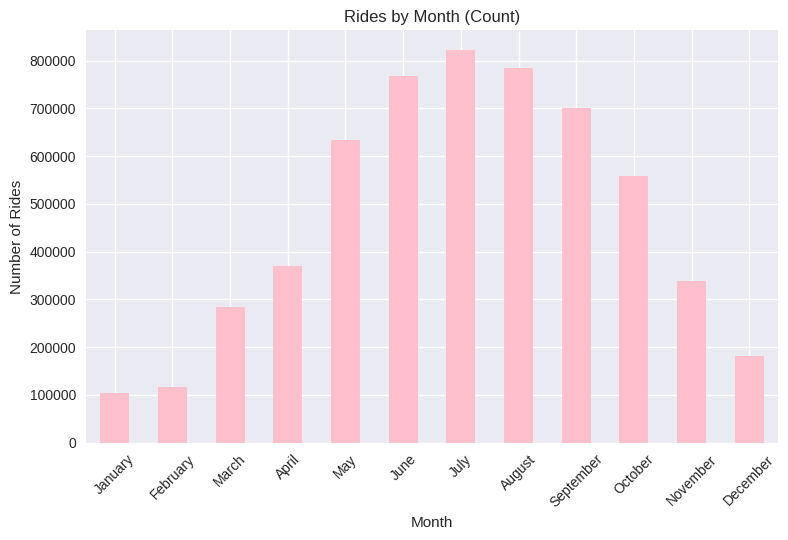

In [ ]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Grouping by month_name and count rides
month_counts = df.groupby('month_name')['ride_id'].count()

# Reindex to enforce calendar order (missing months will show as NaN, so fill with 0)
month_counts = month_counts.reindex(month_order, fill_value=0)

# Plot raw counts with correct order
month_counts.plot(kind='bar', color='pink', title='Rides by Month (Count)')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---
##**Bivariate Analysis With Visuals**
---
Bivariate analysis explores the relationship between two variables to identify behavioral differences across user segments. User type (member casual) is treated as the primary segmentation variable and is analyzed against temporal and ride related features.

####**This section includes:**


*   Rider type compared with month, day of week, weekend, and hour

*   Rider type compared with ride characteristics such as ride length and bike type
*   Selective location-based comparisons using top stations

####**Purpose:**


*  Explain how riding behavior differs between members and casual riders

*  Move from descriptive patterns to comparative insights
*   Support segmentation driven and business-relevant conclusions











---
#####**1. Rider Type vs Month**

**Objective:**

To examine seasonal usage patterns and identify how ride frequency varies between member and casual riders across different months.

**Question:**

How does the ride frequency of member and casual riders vary across different months of the year?



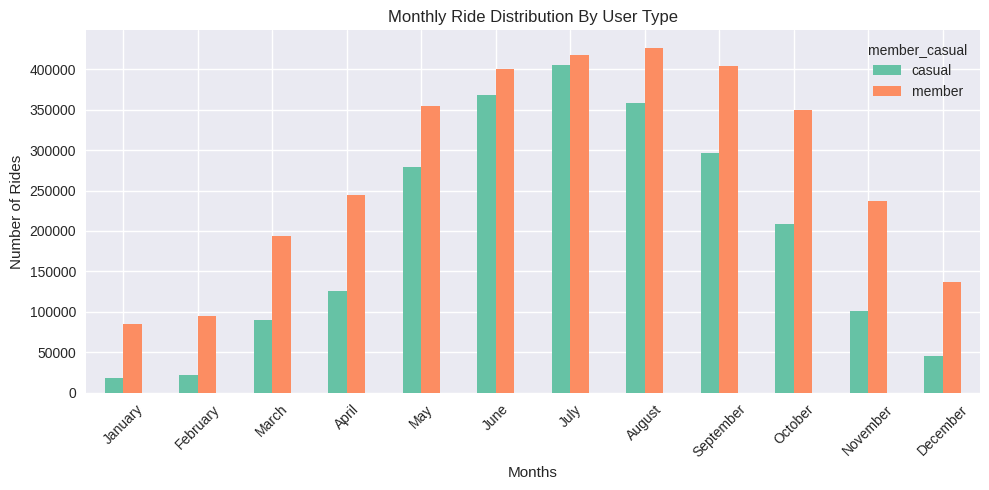

In [ ]:
month_rider =( df.groupby(['month_name', 'member_casual']).size().unstack().reindex(month_order) )

month_rider.plot(kind = 'bar', figsize=[10,5])
plt.xlabel('Months')
plt.ylabel('Number of Rides')
plt.title('Monthly Ride Distribution By User Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. #### **Rider Type vs Weekday**

**Objective:**

To analyze weekly usage patterns and understand how ride frequency differs between member and casual riders across the days of the week.

**Question:**

How does the ride frequency of member and casual riders vary across different weekdays?

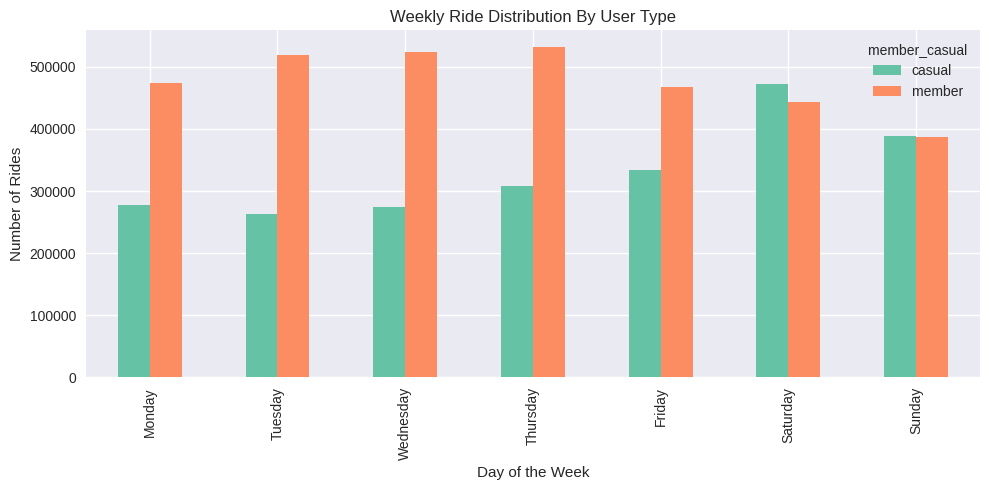

In [ ]:
week_order= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_rider=df.groupby(['day_name','member_casual']).size().unstack().reindex(week_order)
week_rider.plot(kind = 'bar', figsize=[10,5])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Weekly Ride Distribution By User Type')
plt.tight_layout()
plt.show()

3. #### **Rider Type: Weekend vs Weekday**

**Objective:**

To investigate differences in ride frequency between member and casual riders on weekends compared to weekdays.

**Question:**

How does the ride frequency of member and casual riders differ between weekends and weekdays?

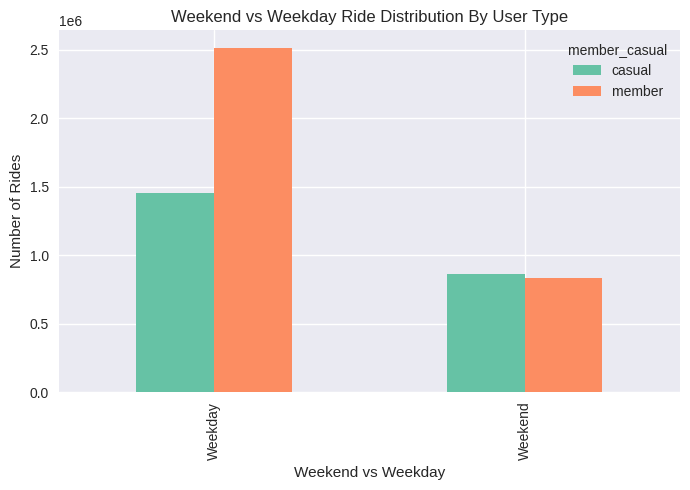

In [ ]:
weekend_rider = df.groupby(['is_weekend', 'member_casual']).size().unstack()
weekend_rider.plot(kind='bar', figsize=[7,5])
plt.xlabel('Weekend vs Weekday')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'])
plt.ylabel('Number of Rides')
plt.title('Weekend vs Weekday Ride Distribution By User Type')
plt.tight_layout()
plt.show()

4. #### **Rider Type vs Hour of Day**

**Objective:**

To explore hourly usage patterns and determine how ride frequency varies between member and casual riders throughout the day.

**Question:**

How does the ride frequency of member and casual riders change across different hours of the day?

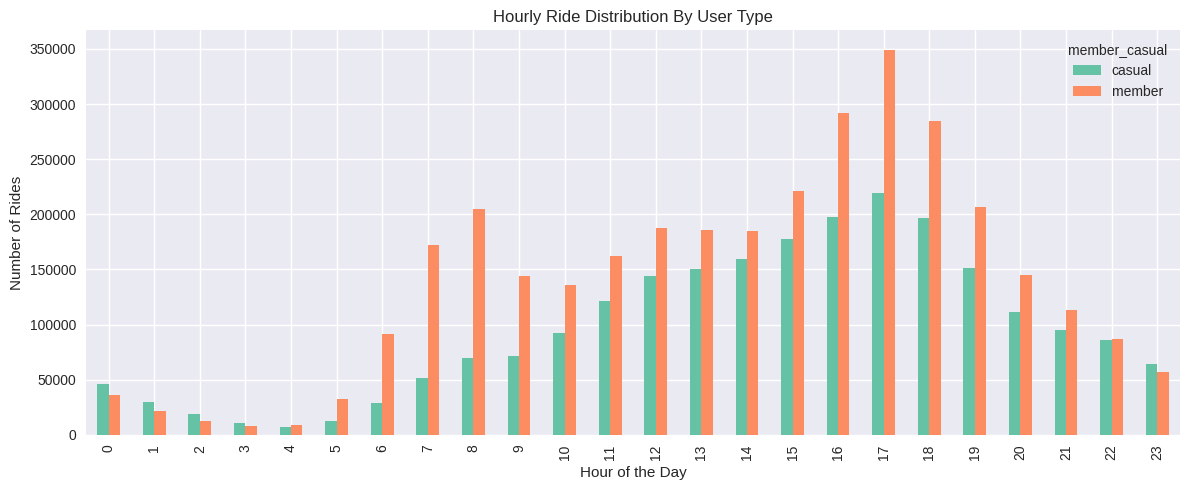

In [ ]:
hourly_rider = df.groupby(['hour', 'member_casual']).size().unstack()
hourly_rider.plot(kind = 'bar', figsize=[12,5])
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Hourly Ride Distribution By User Type')
plt.tight_layout()
plt.show()

5. #### **Rider Type vs Ride Length**

**Objective:**

To analyze the distribution of ride lengths and compare how ride duration varies between member and casual riders.

**Question:**

How does the ride length differ between member and casual riders?

In [1]:
rider_length = df.groupby(['member_casual'])['ride_length'].mean()
rider_length.plot(kind = 'bar', figsize=[5,5])
plt.xlabel('Member Type')
plt.ylabel('Average Ride Length (In Minutes)')
plt.title('Average Ride Length By User Type')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

6. #### **Rider Type vs Rideable Type**

**Objective:**

To examine the usage patterns of different rideable types and compare preferences between member and casual riders.

**Question:**

How does the usage of different rideable types vary between member and casual riders?

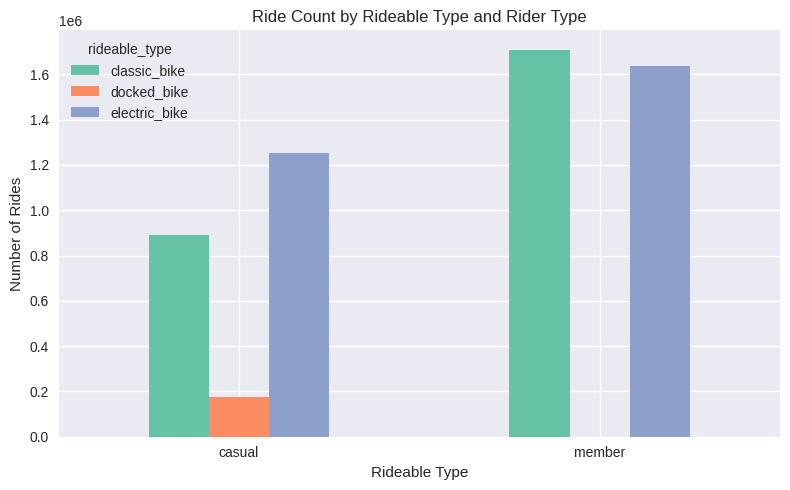

In [ ]:
rider_rideable= df.groupby(['member_casual','rideable_type']).size().unstack()
rider_rideable.plot(kind='bar', figsize=(8,5))
plt.title('Ride Count by Rideable Type and Rider Type')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


7. #### **Rider Type vs Top 10 Start Stations**

**Objective:**

To identify the most popular start stations and compare how ride frequency at these stations differs between member and casual riders.

**Question:**

What are the top 10 start stations, and how does ride frequency at these stations vary between member and casual riders?

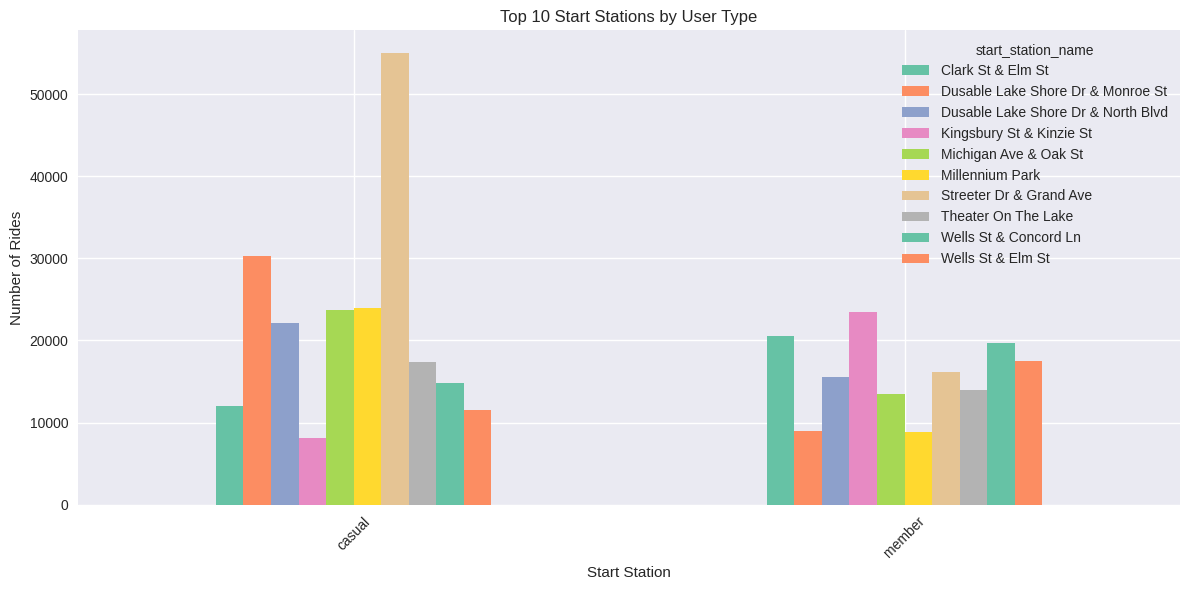

In [ ]:
# getting top 10 start stations
#top_start = df_clean['start_station_name'].value_counts().head(10).index

# filtering data frame to above top stations
df_top_start = df_clean[df_clean['start_station_name'].isin(top_start)]

# grouping
top_start_rider = df_top_start.groupby(['member_casual','start_station_name']).size().unstack()
top_start_rider.plot(kind='bar', figsize=(12,6) )
plt.title('Top 10 Start Stations by User Type')
plt.xlabel('Start Station')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. #### **Rider Type vs Top 10 End Stations**

**Objective:**

To identify the most popular end stations and compare how ride frequency at these stations differs between member and casual riders.

**Question:**

What are the top 10 end stations, and how does ride frequency at these stations vary between member and casual riders?

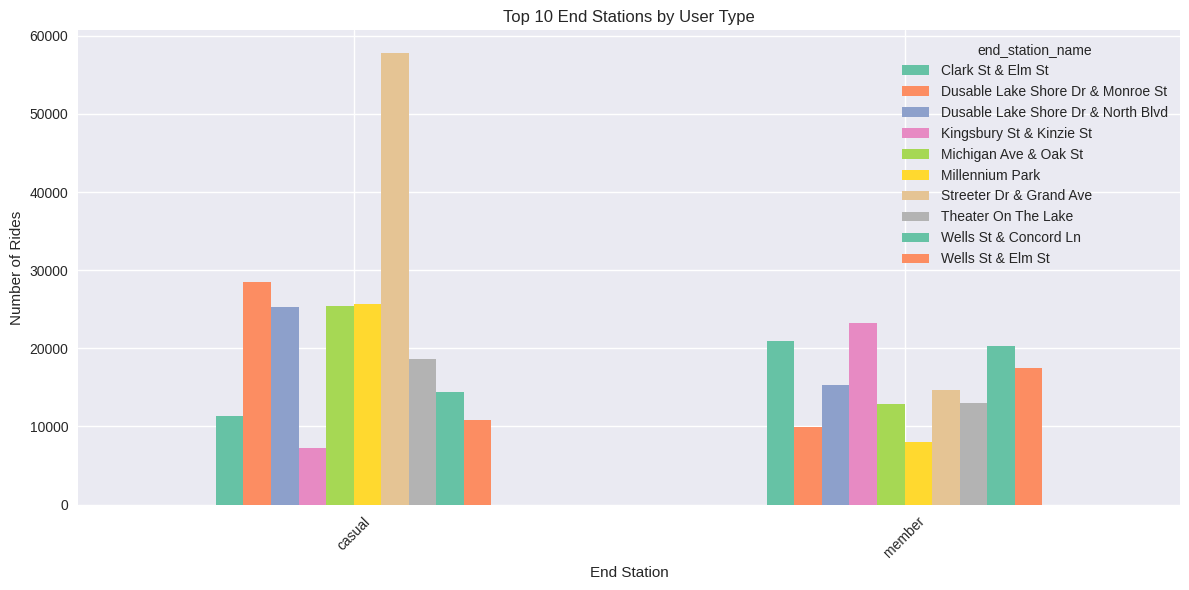

In [ ]:
# Getting top 10 end stations

# filtering data frame to above end stations
df_top_end = df_clean[df_clean['end_station_name'].isin(top_end.index)]

# grouping
top_end_rider = df_top_end.groupby(['member_casual','end_station_name']).size().unstack()
top_end_rider.plot(kind='bar', figsize=(12,6) )
plt.title('Top 10 End Stations by User Type')
plt.xlabel('End Station')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

